In [79]:
from __future__ import print_function
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

In [5]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [7]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)

In [8]:
print(nClasses)

10


In [9]:
#set the plotter
plt.figure(figsize=[10,5])


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Ground Truth : 0')

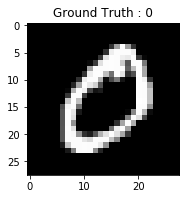

In [10]:
plt.subplot(121)
plt.imshow(train_images[1], cmap="gray")
plt.title("Ground Truth : {}".format(train_labels[1]))

In [11]:
train_images[1].shape

(28, 28)

In [12]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData=np.prod(train_images.shape[1:])

In [13]:
dimData

784

In [14]:
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [15]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [16]:
train_data /= 255
test_data /= 255

In [17]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [18]:
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])


Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [38]:
from keras.models import Sequential
from keras.layers import Dense

In [49]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(dimData,), kernel_initializer='glorot_uniform'))
model.add(Dense(512,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(nClasses,activation='softmax',kernel_initializer='glorot_uniform'))

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [51]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

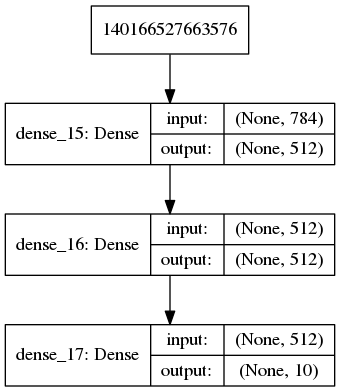

In [52]:
from IPython.display import Image
Image("model.png")

In [53]:
model.compile(optimizer='rmsprop', loss='kullback_leibler_divergence', metrics=['accuracy'])

In [54]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.2692 - acc: 0.9163 - val_loss: 0.1351 - val_acc: 0.9572
Epoch 2/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0922 - acc: 0.9718 - val_loss: 0.1071 - val_acc: 0.9681
Epoch 3/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0568 - acc: 0.9828 - val_loss: 0.1044 - val_acc: 0.9673
Epoch 4/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0394 - acc: 0.9872 - val_loss: 0.0662 - val_acc: 0.9822
Epoch 5/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0290 - acc: 0.9904 - val_loss: 0.0710 - val_acc: 0.9809
Epoch 6/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0222 - acc: 0.9930 - val_loss: 0.0755 - val_acc: 0.9801
Epoch 7/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0169 - acc: 0.9947 - val_loss: 0.0887 - val_acc

Text(0.5, 1.0, 'Loss Curves')

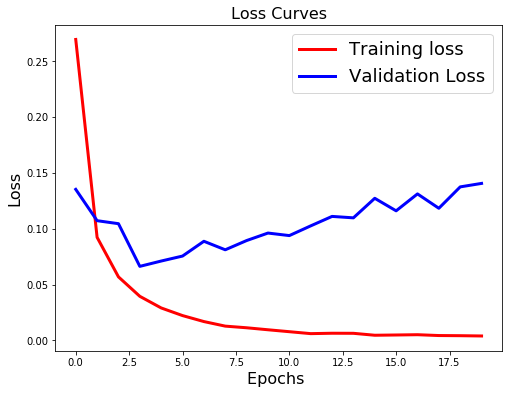

In [55]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

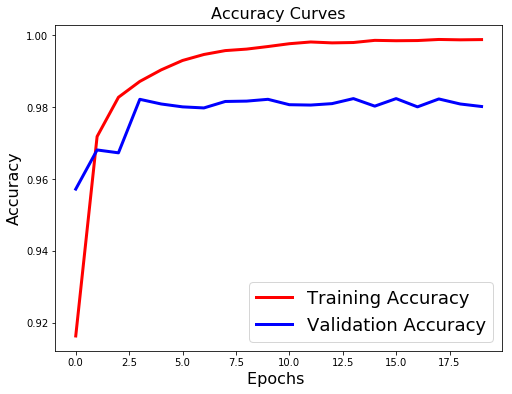

In [56]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [57]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 1s 65us/step


In [58]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data : Loss = 0.14046145954146286, accuracy = 0.9802
